<a href="https://colab.research.google.com/github/NoeDebrois/Artificial-NN-and-Deep-Learning/blob/main/Linear_Classifier_Template_Matching_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks and Deep Learning

---

## Extra Material: Linear Classifier Template Matching Interpretation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
import matplotlib.pyplot as plt

In [ ]:
def prepare_data(dataset='cifar10'):
    # Load dataset based on the input
    if dataset == 'cifar10':
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    else:
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        # Add channel dimension for MNIST data
        x_train = np.expand_dims(x_train, -1)
        x_test = np.expand_dims(x_test, -1)

    # Normalise the image data to the range 0-1
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Convert labels to one-hot encoded format
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

class LinearClassifier(Model):
    # Initialise the model with a flatten layer and a dense output layer
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.flatten = layers.Flatten()
        self.dense = layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(1e-2))

    # Define the forward pass of the model
    def call(self, x):
        x = self.flatten(x)
        return self.dense(x)

def visualise_weights(model, class_names, dataset='cifar10'):
    # Get dense layer weights and reshape into image form
    weights = model.dense.kernel.numpy()

    # Reshape weights based on dataset type
    if dataset == 'cifar10':
        weight_images = weights.reshape(32, 32, 3, 10)
    else:
        weight_images = weights.reshape(28, 28, 1, 10)

    # Normalise the weight images for better visualisation
    w_min, w_max = np.min(weight_images), np.max(weight_images)
    weight_images = (weight_images - w_min) / (w_max - w_min)

    # Plot the weight images corresponding to each class
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for idx, ax in enumerate(axes.flat):
        img = weight_images[:, :, :, idx]

        # Clip the image values between 0 and 1
        img = np.clip(img, 0, 1)

        # Display image in appropriate colour or grayscale
        if dataset == 'cifar10':
            ax.imshow(img)
        else:
            ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(class_names[idx])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def train_and_visualise(epochs=10, batch_size=32, dataset='cifar10'):
    # Load and prepare data for training
    (X_train, y_train), (X_test, y_test) = prepare_data(dataset)

    # Initialise and compile the linear classifier model
    model = LinearClassifier()
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
        loss=tf.keras.losses.CategoricalHinge(),
        metrics=['accuracy']
    )

    # Train the model
    model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1
    )

    # Define class names for CIFAR-10 or MNIST
    if dataset == 'cifar10':
        class_names = ['Aeroplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                       'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    else:
        class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
                       'Five', 'Six', 'Seven', 'Eight', 'Nine']

    # Visualise the weights of the model
    visualise_weights(model, class_names, dataset)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8379 - loss: 0.5399
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8846 - loss: 0.4023
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8837 - loss: 0.4062
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8828 - loss: 0.4030
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8807 - loss: 0.4068
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8851 - loss: 0.4019
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8827 - loss: 0.4065
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8828 - loss: 0.4041
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8848 - loss: 0.4026
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8806 - loss: 0.4084


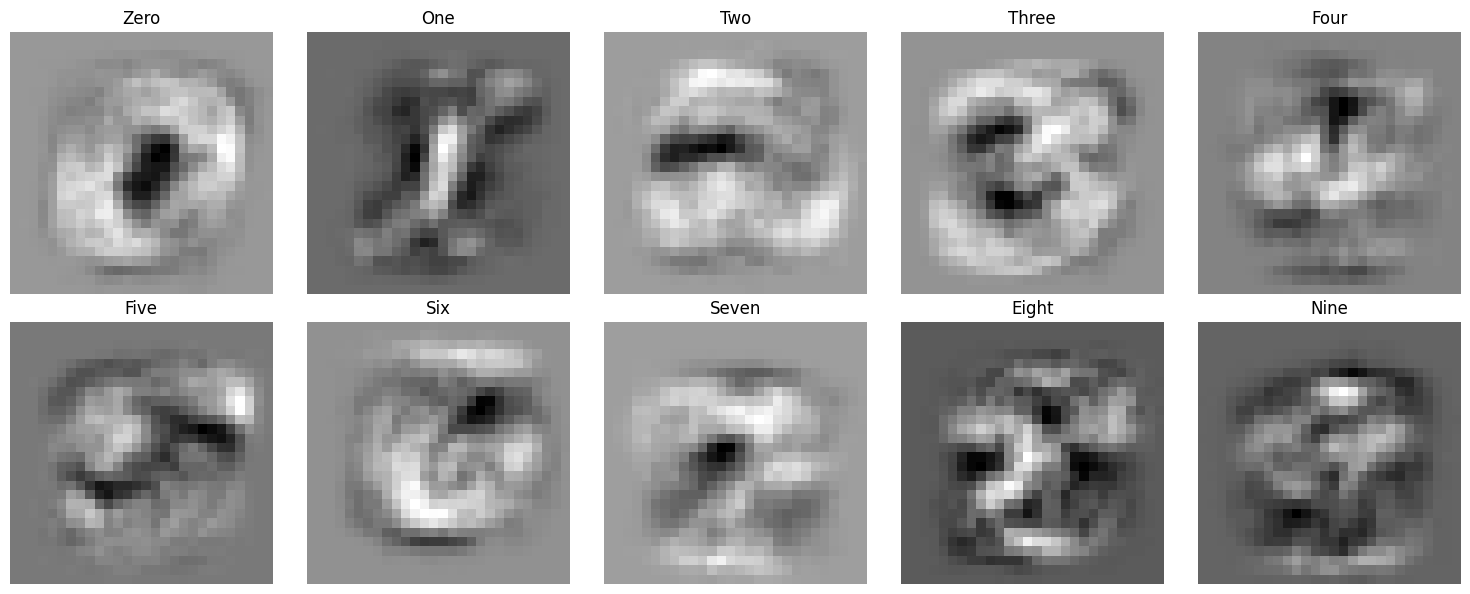

In [ ]:
# Train and visualise for MNIST
train_and_visualise(dataset='mnist')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1757 - loss: 18.0792
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1908 - loss: 16.1212
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1962 - loss: 15.9173
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1994 - loss: 15.5523
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1918 - loss: 16.2323
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2018 - loss: 15.3132
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2008 - loss: 15.5298
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1971 - loss: 15.4994
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1979 - loss: 15.7228
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1949 - loss: 15.8551


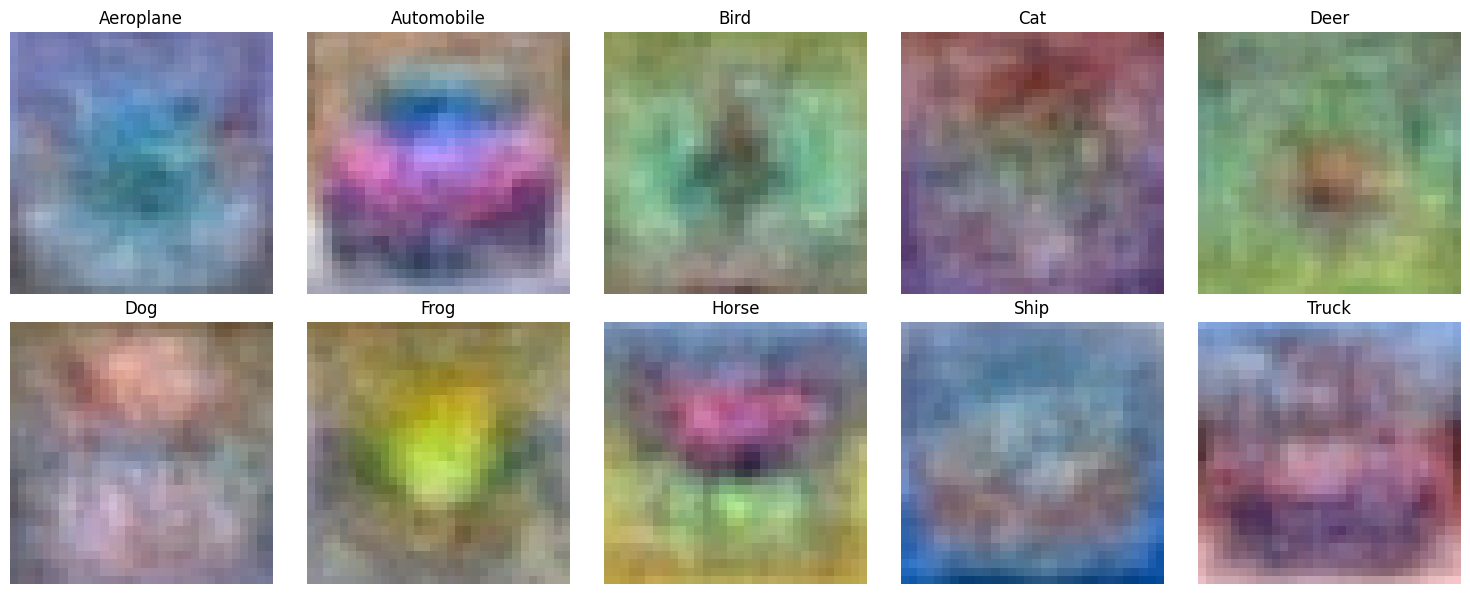

In [ ]:
# Train and visualise CIFAR10
train_and_visualise(dataset='cifar10')